# [Машинное обучение на ФБМФ](https://thetahat.ru/courses/bm-2025-spr)

## Логистическая регрессия

В этом ноутбуке мы рассмотрим пример построения модели логистической регрессии и предварительной обработки данных. Логистическая регрессия является одним из методов классификации и используется для предсказания категориальных исходов.



In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.datasets import make_classification
pd.set_option('future.no_silent_downcasting', True)
RANDOM_STATE=42

### 0. Логистическая регрессия на искусственных данных

Рассмотрим искусственные данные с бинарным признаком из `sklearn.datasets`

In [6]:
# Генерация синтетических данных
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=42)

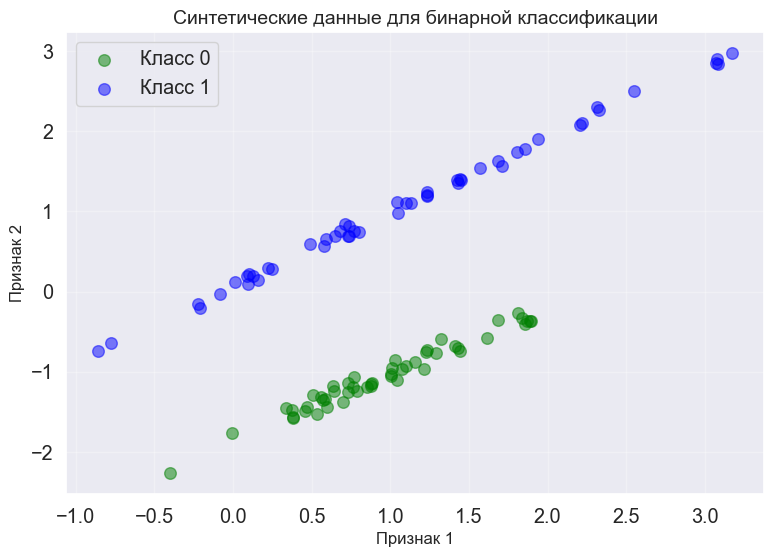

In [8]:
# Визуализация
plt.figure(figsize=(9, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='green',
            s=70, label='Класс 0', alpha=0.5)
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='blue',
            s=70, label='Класс 1', alpha=0.5)
plt.title('Синтетические данные для бинарной классификации', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Теперь обучим модель логистической регрессии** с помощью класса <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">`LogisticRegression`</a>.

Давайте рассмотрим, как работают методы `fit` и `predict` для логистической регрессии в случае бинарной классификации

---

`fit` метод

Метод `fit(X, y)` применяет максимально правдоподобное оценивание для вычисления оптимальных значений параметров модели $\theta$:

$$
\max_{\theta} \sum_{i=1}^{n} \left[ y_i \log(\sigma(x_i \theta)) + (1-y_i) \log(1-\sigma(x_i \theta)) \right]
$$

где $\sigma(x_i \theta)$ — сигмоидная функция, которая преобразует линейную комбинацию признаков в вероятность:
$$
\sigma(x_i \theta) = \frac{1}{1 + \exp(-x_i \theta)}
$$

`predict` метод

Метод `predict(X)` сначала вычисляет вероятности принадлежности к классу 1 по формуле:

$$
\widehat{p} = \sigma(X \widehat{\theta}) = \frac{1}{1 + \exp(-X \widehat{\theta})}
$$

Затем переводит эти вероятности в бинарные классы («0» или «1») с использованием порога, обычно равного 0.5. То есть:

$$
\widehat{y} =
\begin{cases}
1, & \text{если } \widehat{p} \geq 0.5 \\
0, & \text{если } \widehat{p} < 0.5
\end{cases}
$$

Эти шаги позволяют логистической регрессии моделировать вероятность принадлежности к определенному классу и принимать решение о классификации на этом основании.



In [11]:
# Обучение модели
model = LogisticRegression(penalty=None)
model.fit(X, y)

LogisticRegression(penalty=None)

Введем функцию для визуализации предсказаний модели линейной регрессии

In [14]:
def plot_decision_boundary(model, X, y, figsize=(10, 6), title='Предсказания модели линейной регрессии',
                           xlabel='Признак 1', ylabel='Признак 2',
                           cmap='coolwarm', colorbar_label='Вероятность класса 1'):
    """
    Визуализирует предсказание модели бинарной классификации.

    Параметры:
    model - обученная модель с методом predict_proba
    X - матрица признаков (только первые два признака используются для визуализации)
    y - целевые метки
    figsize - размер графика
    title - заголовок
    xlabel/ylabel - подписи осей
    cmap - цветовая схема
    colorbar_label - подпись цветовой шкалы
    """
    # Установка границ
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Создание сетки
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Предсказание вероятностей для сетки
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Построение графика
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Визуализация исходных точек
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=cmap)

    # Настройка оформления
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.colorbar(label=colorbar_label)
    plt.show()


Визуализируем полученные результаты

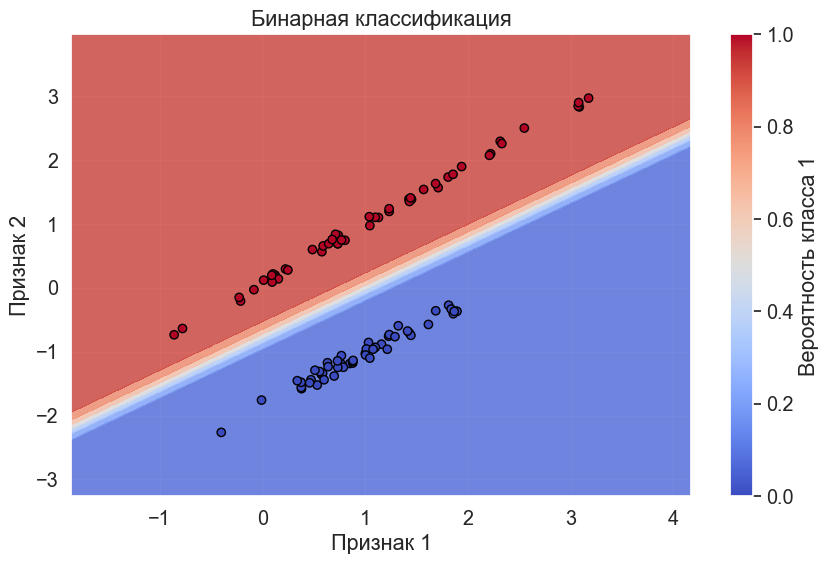

In [17]:
plot_decision_boundary(model, X, y,
                      title='Бинарная классификация',
                      xlabel='Признак 1',
                      ylabel='Признак 2')

Видим, что с помощью предсказания получаются достаточно точными, выборка является линейно разделимой. Значения вероятностей, равные 0.5 примерно равноудалены от выборок.

### 1. Постановка задачи логистической регресии на реальных данных

Рассмотрим <a href="https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data" >данные</a> заболеваний сердца. В каждой строке представлены медицинские и другие показатели для каждого человека, а также наличие/отсутствие заболеваний сердца. Описание признаков можно посмотреть по ссылке.

**Задача:** предсказать *наличие/отсутствие патологии* по остальным признакам.



Вот несколько ключевых моментов, чем эта задача может быть полезна:

1. **Раннее выявление заболеваний:** система может помочь в идентификации пациентов с высоким риском развития сердечно-сосудистых заболеваний, что позволяет провести профилактику или раннее лечение, увеличивая шансы на успешное выздоровление.

2. **Снижение затрат на здравоохранение:** Предсказание может помочь снизить расходы на здравоохранение, позволяя сосредоточить ресурсы на более нуждающихся пациентах, что приводит к более эффективному использованию медицинских ресурсов.

3. **Персонализированная медицина:** Модель может способствовать персонализации медицинских рекомендаций, основываясь на уникальных признаках каждого пациента, что повышает качество обслуживания и удовлетворенность пациентов.

4. **Исследования и разработки:** Анализ данных позволяет выявлять новые паттерны и взаимосвязи, которые могут привести к новым научным открытиям и развитию новых методов лечения.



Загрузим данные

In [30]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Посмотрим на размер таблицы

In [33]:
data.shape

(920, 16)

Бинаризуем признак num (num > 0 – наличие паталогии, 0 – отсутствие патологий)

In [ ]:
data['num'] = data['num'] > 0

Заполним пропуски

In [ ]:
data.ffill(inplace=True)

Разделим данные на обучающие и тестовые.

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=RANDOM_STATE)
train.shape, test.shape

((736, 16), (184, 16))

### 2. Обучение

Выделим категории признаков

In [ ]:
categorial_features = ['sex', 'dataset', 'cp', 'fbs',
                       'restecg', 'exang', 'slope', 'thal', 'thal']  # категориальные признаки
real_features = ['age', 'trestbps', 'chol', 'thalch',
                 'oldpeak', 'ca']  # вещественные признаки
target_feature = 'num'  # целевой признак

Посмотрим на визуализацию совместных распределений вещественных признаков:

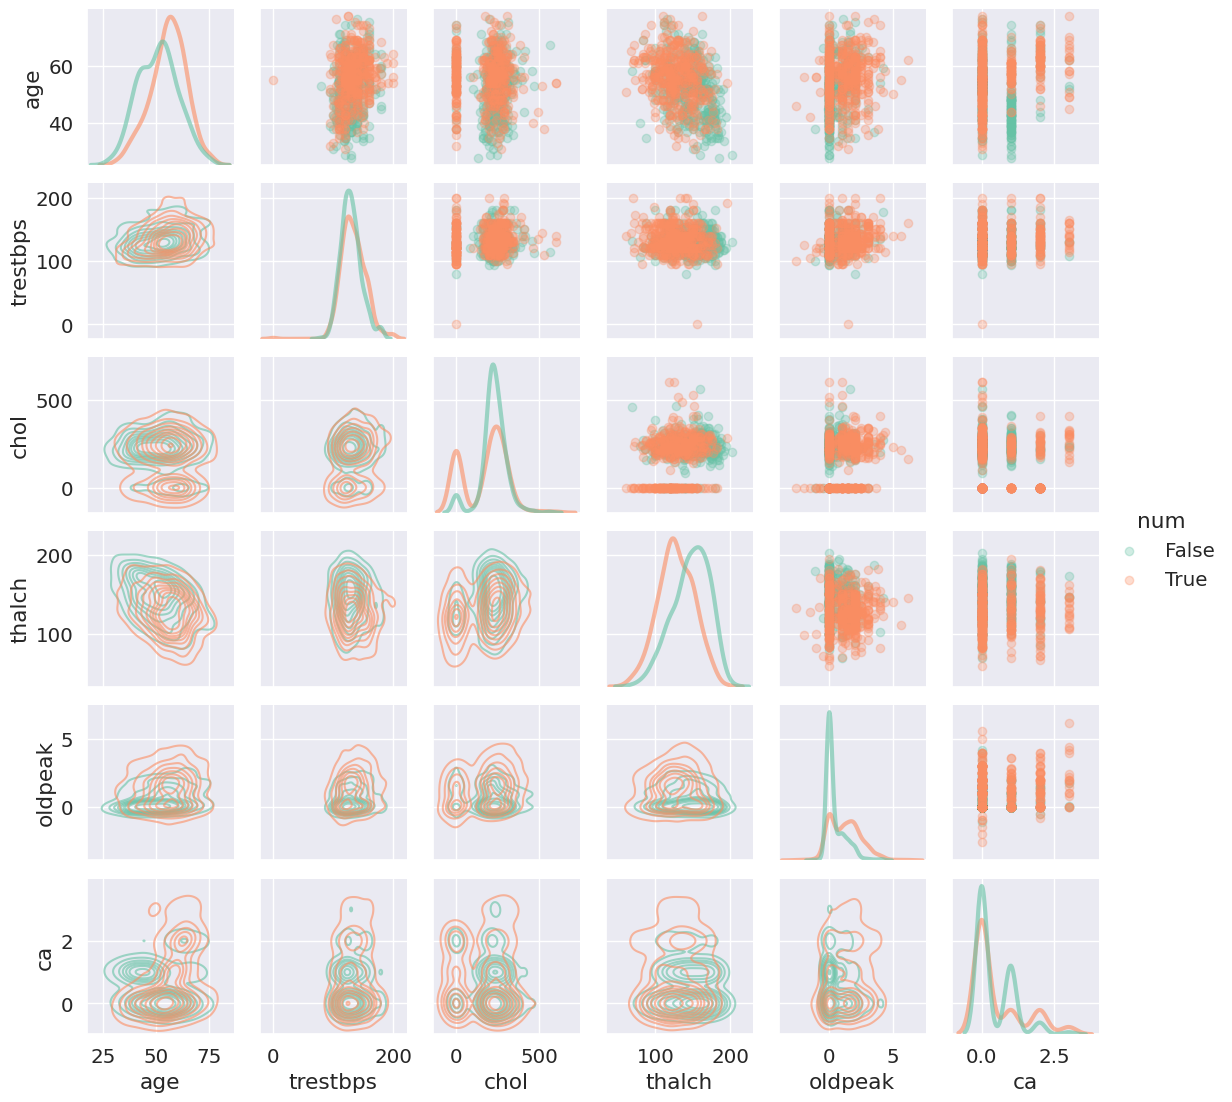

In [ ]:
g = sns.PairGrid(train[real_features + [target_feature]],
                 hue=target_feature, diag_sharey=False, height=3)
g.fig.set_size_inches(11,11)
g.map_lower(sns.kdeplot, alpha=0.6)
g.map_upper(plt.scatter, alpha=0.3)
g.map_diag(sns.kdeplot, lw=3, alpha=0.6,
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

g.add_legend();

По графикам сразу можно сделать следующие выводы:
* Вероятность получить патологию растет с увеличением возраста;
* Люди, достигавшие большую частоту сердцебиения, более склонны к болезням сердца

Видимо, эти признаки должны оказать существенное влияние при построении регрессионной модели.

---
Закодируем категориальные признаки с помощью  [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)


In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

array([[1., 0., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

Можем посмотреть на то, как у нас "обучились" категории. Для каждого категориального признака приведен список его категорий

In [ ]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
       dtype=object),
 array(['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina'],
       dtype=object),
 array([False, True], dtype=object),
 array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object),
 array([False, True], dtype=object),
 array(['downsloping', 'flat', 'upsloping'], dtype=object),
 array(['fixed defect', 'normal', 'reversable defect'], dtype=object),
 array(['fixed defect', 'normal', 'reversable defect'], dtype=object)]

Соединим вместе вещественные признаки и закодированные категориальные

In [ ]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(736, 23)

Наконец, **обучаем саму модель логистической регрессии** с помощью класса <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">`LogisticRegression`</a>.

Напомним, как работают методы `fit` и `predict` для логистической регрессии в случае бинарной классификации

---

`fit` метод

Метод `fit(X, y)` применяет максимально правдоподобное оценивание для вычисления оптимальных значений параметров модели $\theta$:

$$
\max_{\theta} \sum_{i=1}^{n} \left[ y_i \log(\sigma(x_i \theta)) + (1-y_i) \log(1-\sigma(x_i \theta)) \right]
$$

где $\sigma(x_i \theta)$ — сигмоидная функция, которая преобразует линейную комбинацию признаков в вероятность:
$$
\sigma(x_i \theta) = \frac{1}{1 + \exp(-x_i \theta)}
$$

`predict` метод

Метод `predict(X)` сначала вычисляет вероятности принадлежности к классу 1 по формуле:

$$
\widehat{p} = \sigma(X \widehat{\theta}) = \frac{1}{1 + \exp(-X \widehat{\theta})}
$$

Затем переводит эти вероятности в бинарные классы («0» или «1») с использованием порога, обычно равного 0.5. То есть:

$$
\widehat{y} =
\begin{cases}
1, & \text{если } \widehat{p} \geq 0.5 \\
0, & \text{если } \widehat{p} < 0.5
\end{cases}
$$

---
&#x2753; **Вопрос** &#x2753;

> Что делать в случае многоклассовой классификации?

<details>
  <summary> Кликни для показа ответа </summary>


Для **многоклассовой классификации** логистическая регрессия в scikit-learn может использовать два подхода для предсказания вероятностей классов:

1. **Multinomial (Softmax Function):** Когда параметр `multi_class` равен "multinomial", используется функция софтмакс для расчета вероятности принадлежности к каждому классу. Это позволяет модели одновременно учитывать все возможные классы при предсказании.

$$
\text{softmax}(z)_k = \frac{\exp(z_k)}{\sum_{j=1}^{K} \exp(z_j)}
$$

где $z_k$ — это k-й элемент входного вектора $z$


2. **One-vs-Rest (OvR):** В противном случае, используется подход one-vs-rest. В этом подходе для каждого класса $c \in \{1, \dots, C\} $ обучается бинарный классификатор.

Каждый классификатор $f_c(x)$ оценивает вероятность принадлежности объекта $ x $ к своему классу:  
$$
f_c(x) = P(y = c \mid x).
$$  

Для прогнозирования на новых данных вычисляется "уверенность" каждого классификатора, и выбирается класс с наибольшей вероятностью:  
$$
\widehat{y} = \arg\max_{c} f_c(x).
$$
  
>
</details><br/>




---

Теперь обучим модель линейной регрессии по нашим данным. Указываем `fit_intercept=True` для оценки свободного коэффициента, что позволяет не добавлять в матрицу признаков столбец из единиц.

*Замечание.* О нормализации данных пойдет речь в домашнем задании.

In [ ]:
model = LogisticRegression(fit_intercept=True, max_iter=2000)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

LogisticRegression(max_iter=2000)

Посмотрим на результат обучения. Оценки коэффициентов перед признаками

In [ ]:
real_features

['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

In [ ]:
model.coef_

array([[ 6.30546943e-03,  1.01136305e-03,  9.11968449e-04,
        -5.63912566e-03,  5.37409422e-01,  3.44013399e-01,
         1.17381333e+00, -5.34313875e-01,  2.47382214e+00,
        -1.69733701e-01, -1.68421391e+00, -1.18970144e+00,
        -1.13450762e+00,  3.24800666e-01, -9.95124842e-02,
         6.75236566e-02,  8.00701445e-01,  7.56401933e-01,
         1.52701066e-03, -5.38812784e-01,  1.56503713e-01,
        -5.38812784e-01,  1.56503713e-01]])

Оценка свободного коэффициента

In [ ]:
model.intercept_

array([-1.15815598])

   &#x2753; **Вопрос** &#x2753;

> Как можно интерпретировать значения коэффициентов?

<details>
  <summary> Кликни для показа ответа </summary>

1. **Знак коэффициента**
   - Положительный коэффициент казывает на то, что с увеличением значения признака шансы первого класса увеличиваются при прочих равных условиях.
   - Отрицательный коэффициент означает, что с увеличением значения признака шансы на положительный исход (первый признак) уменьшаются при прочих равных условиях.
2. **Значение коэффициента**
- Пусть для некоторого объекта полученные вероятности классов соответственно равны $p_0$ и $(1 - p_0)$.
   $$
   \log\left(\frac{p_0}{1-p_0}\right) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_i \cdot x_i + \ldots + \theta_n \cdot x_n
   $$
- Тогда при увеличении значения i-го признака на 1 получим следующее:
   $$
   \log\left(\frac{p_1}{1-p_1}\right) = \log\left(\frac{p_0}{1-p_0}\right) + \theta_i
   $$
  
$$
\log\left(\frac{p_1}{1-p_1}\cdot\frac{1-p_0}{p_0}\right) = \theta_i
$$





>
</details><br/>


Таким образом, в полученной модели, с увеличением возраста, кровяного давления, уровня холестерина, будет возрастать шанс заболевания


### 3. Тестирование и оценка качества

Выполним теперь с тестовым множеством данные те же преобразования. Напомним еще раз, что некоторые преобразования можно было сделать со всеми данными, это было бы корректно. Однако во избежании ошибок в будущем рекомендуем определять преобразования только по обучающим данным, а затем применять их для тестовых.

In [ ]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

Выполним *предсказание* построенной ранее моделью с помощью метода `predict`

In [ ]:
test_preds = model.predict(X_test)

Посчитать **ошибку предсказания** можно разными способами. Рассмотрим одну из основных метрик.

- T - колиество объектов выборки, для которых верно предсказан класс
- N - общее число объектов в выборке




**Точность (Accuracy)** \
Точность определяет общую долю правильно классифицированных случаев:

$$\text{Accuracy} = \frac{\text{T}}{\text{N}}$$

In [ ]:
def get_metrics_dataframe(y_true, y_pred, round_decimal=2):
    """
    Возвращает датафрейм с метрикой классификации.

    Параметры:
        y_true (array-like): Истинные метки
        y_pred (array-like): Предсказанные метки
        round_decimal (int): Округление значений
    """
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
    }

    df = pd.DataFrame(
        data=[metrics.values()],
        columns=metrics.keys()
    ).round(round_decimal)

    return df


Для сравнения посчитаем предсказания и ошибки на обучающем множестве.

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

Метрики на обучающем множестве

In [ ]:
# Вычисляем точность
get_metrics_dataframe(train[target_feature], train_preds)

,Accuracy
0,0.85


Точность на тестовом множестве

In [ ]:
get_metrics_dataframe(test[target_feature], test_preds)

,Accuracy
0,0.85


Видим, что точность на обучающем и тестовом множествах принимает близкие значения, качество классификации по этой метрике совпадает.